# Lesson: Hypothesis Testing - COMPARISON OF GROUPS: $χ^2$

<a href = "https://www.canva.com/design/DAFwzVUAL04/hqFhoG1kpp6musmnJU_ugA/view?utm_content=DAFwzVUAL04&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">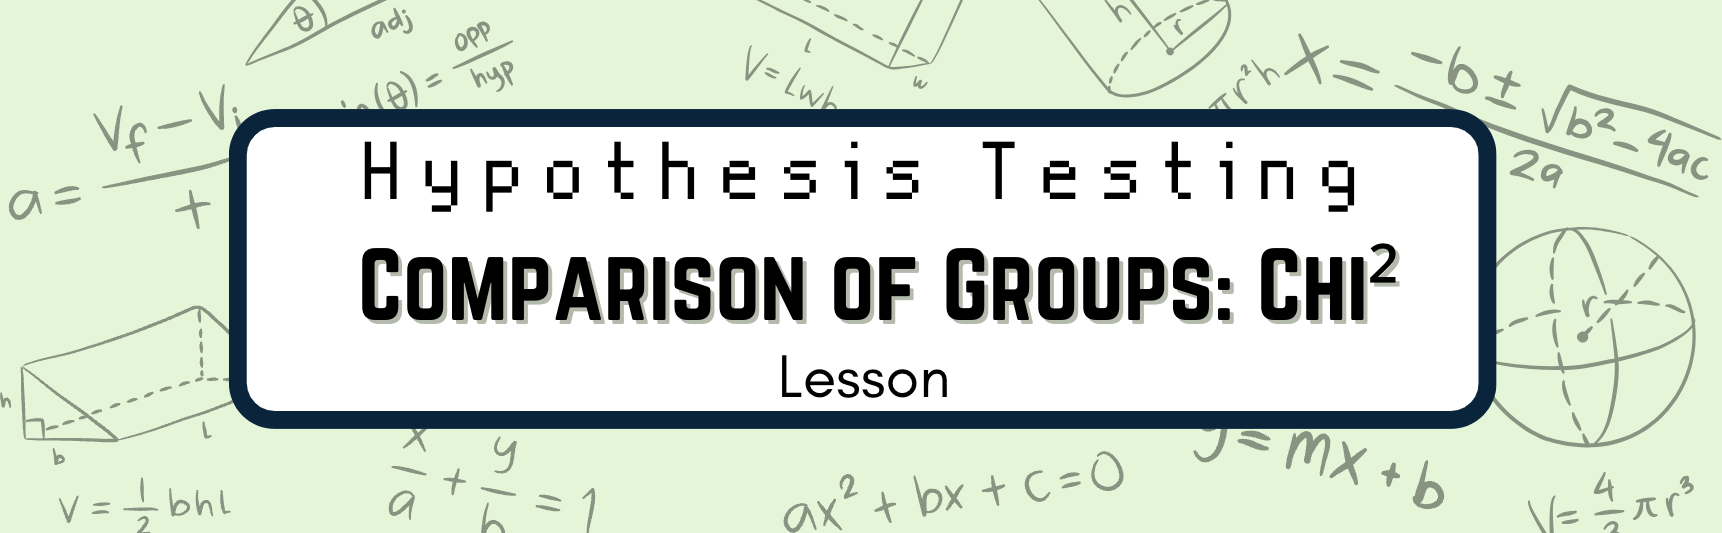</a>

<hr style="border:2px solid gray">

# $\chi^2$ Test for Independence

## Chi


Allows us to test a hypothesis that one group is independent of another.

 $H_0$ is *always* that there is **no association between the groups** (*they are independent*)
 \
 $H_a$ is that there **is an association** (*they are not independent*) between the groups
 
$\chi^2$ is ran on discrete vs discrete (cat vs cat)

## The Quick Steps to $\chi^2$

* form hypothesis
* make contigency table
* use stats.chi2_contingency

## Tips Dataset Example

In [1]:
import pandas as pd
import numpy as np

from pydataset import data
from scipy import stats

In [37]:
df = data('tips')

In [38]:
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## Is smoking independent of time of day

### 1. Form hypothesis

* $H_0$: There is **no** association between smoker and time of day
* $H_a$: There is association between smoker and time of day

In [49]:
null = "There is no association between smoker and time of day"

In [40]:
alpha = 0.05

In [41]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [42]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### 2. Make our contingency table
#### This is our contingency table

In [43]:
observed = pd.crosstab(df.smoker, df.time)
observed

time,Dinner,Lunch
smoker,,
No,106,45
Yes,70,23


### 3. use stats.chi2_contingency

In [44]:
stats.chi2_contingency(observed)

(0.5053733928754354,
 0.4771485672079724,
 1,
 array([[108.91803279,  42.08196721],
        [ 67.08196721,  25.91803279]]))

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [48]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p:.4f}''')

Observed:
[[106  45]
 [ 70  23]]

Expected:
[[108  42]
 [ 67  25]]
________________

ꭓ² = 0.5054
p  = 0.4771


In [11]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[106  45]
 [ 70  23]]

Expected
[[108  42]
 [ 67  25]]

----
chi^2 = 0.5054
p     = 0.4771


In [50]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

we fail to reject H₀:There is no association between smoker and time of day


### How do we get the expected values?

In [13]:
# pct of smoker status
df.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

In [14]:
# pct of total dining times
df.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [15]:
# Expected pct of dinner smokers
0.618852 * 0.721311

0.446384754972

In [16]:
# Expected amt of dinner smokers by multiplying by the number of observations
0.446384754972 * df.shape[0]

108.91788021316799

In [17]:
df.shape[0]

244

In [18]:
#observed percent from total
pd.crosstab(df.smoker, df.time, normalize='all')

time,Dinner,Lunch
smoker,,
No,0.434426,0.184426
Yes,0.286885,0.094262


In [51]:
#observed
pd.crosstab(df.smoker, df.time)

time,Dinner,Lunch
smoker,,
No,106,45
Yes,70,23


### Attrition Example

In [52]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [53]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [55]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Is Attrition independent from Business Travel?

#### 1. Form hypotheses

$H_0$: There is no association between Attrition and Business Travel

$H_a$: There is association between Attrition and Business Travel

In [62]:
null = "There is no association between Attrition and Business Travel."

In [56]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [57]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

#### 2. Make a contingency table

In [58]:
observed = pd.crosstab(df.Attrition, df.BusinessTravel)
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


#### 3. Perform ꭓ² Test

In [59]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [60]:
p

5.608614476449931e-06

In [61]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p:.4f}''')

Observed:
[[138 208 887]
 [ 12  69 156]]

Expected:
[[125 232 874]
 [ 24  44 168]]
________________

ꭓ² = 24.1824
p  = 0.0000


In [28]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[138 208 887]
 [ 12  69 156]]

Expected
[[125 232 874]
 [ 24  44 168]]

----
chi^2 = 24.1824
p     = 0.0000


In [63]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

We reject H₀:There is no association between Attrition and Business Travel.


In [29]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


### Is Attrition independent from Department?

#### 1. Form hypotheses

$H_0$: There is no association between attrition and department

$H_a$: There is an association between attrition and department

In [64]:
null = "There is no association between attrition and department."

#### 2. Make a contingency table

In [30]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [31]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [65]:
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


#### 3. Perform ꭓ² Test

In [66]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [67]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p:.4f}''')

Observed:
[[ 51 828 354]
 [ 12 133  92]]

Expected:
[[ 52 806 374]
 [ 10 154  71]]
________________

ꭓ² = 10.7960
p  = 0.0045


In [68]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

We reject H₀:There is no association between attrition and department.


In [69]:
# Here I calculated the Expected percentages for funsies!
pd.DataFrame(((expected / expected.sum())*100).round(2), columns=observed.columns, index=observed.index)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,3.59,54.83,25.45
Yes,0.69,10.54,4.89
